# Install Library

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install ucimlrepo

# Ionosphere Dataset

## Data Preprocessing

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# variable information

In [ ]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [ ]:
y

,Class
0,g
1,b
2,g
3,b
4,g
...,...
346,g
347,g
348,g
349,g


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Convert target to numerical values (0 for 'b', 1 for 'g')
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## HMM Gausian

### Train the model

In [ ]:
test_sizes = [0.2, 0.4, 0.6, 0.8]

results = []
confusion_matrices = []
trained_models = []

for size in test_sizes:
   X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=size)

   # Train separate HMM models for each class
   models = {}
   for class_label in [0, 1]:  # 0 = 'b', 1 = 'g'
        # Get data for this class
        class_data = X_train_scaled[y_train_encoded == class_label]

        # Create and train HMM model
        model = hmm.GaussianHMM(n_components=2, random_state=42)

        model.fit(class_data)
        models[class_label] = model

    # Make predictions
   predictions = []
   for sample in X_test_scaled:
        sample = sample.reshape(1, -1)  # Reshape for HMM
        scores = [model.score(sample) for model in models.values()]
        predicted_class = np.argmax(scores)  # Choose class with highest probability
        predictions.append(predicted_class)


    # Convert to numpy array
   y_pred = np.array(predictions)


   acc = accuracy_score(y_test_encoded, y_pred)
   precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
   recall = recall_score(y_test_encoded, y_pred, average='weighted') # Calculate weighted recall
   f1 = f1_score(y_test_encoded, y_pred, average='weighted') # Calculate weighted F1-score


   cm = confusion_matrix(y_test_encoded, y_pred) # Calculate confusion matrix

   results.append({
       "Testing size":int (size*100),
       "Accuracy":acc,
       "Precision": precision,
       "Recall": recall,
       "F1-score": f1
   })
   confusion_matrices.append({ # Store confusion matrix with metadata
       "Testing size":int (size*100),
       "Confusion Matrix":cm
   })
   trained_models.append({ # Store the trained model with metadata
       "Testing size":int (size*100),
       "Models": models,
       "X_test": X_test_scaled,
       "y_test": y_test_encoded
   })

### Evalution Report

Performance Metrics for Different Training Sizes:


,Testing size,Accuracy,Precision,Recall,F1-score
0,20,0.732394,0.778631,0.732394,0.729625
1,40,0.673759,0.753008,0.673759,0.677444
2,60,0.516588,0.762801,0.516588,0.478291
3,80,0.725979,0.822573,0.725979,0.728376


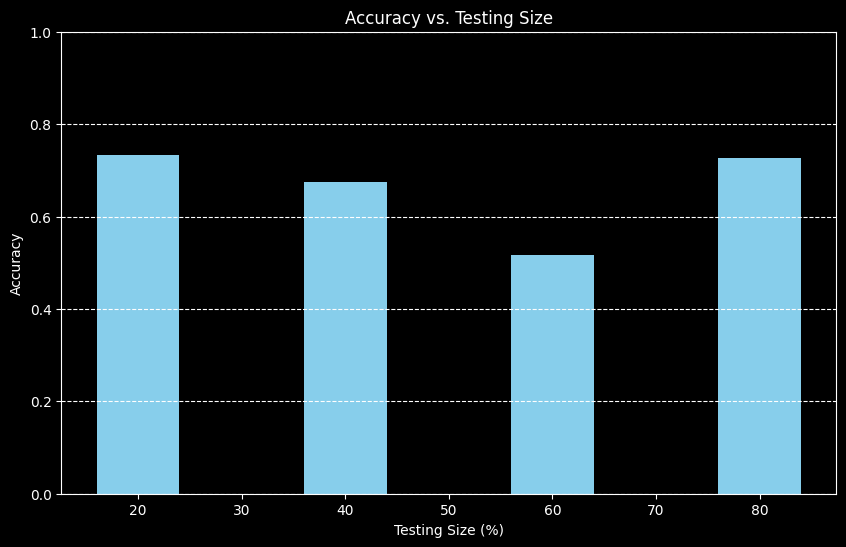

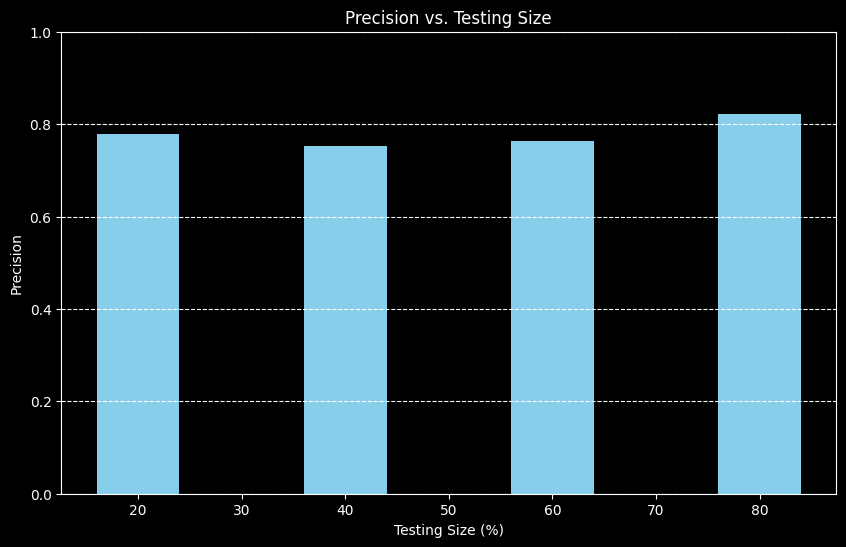

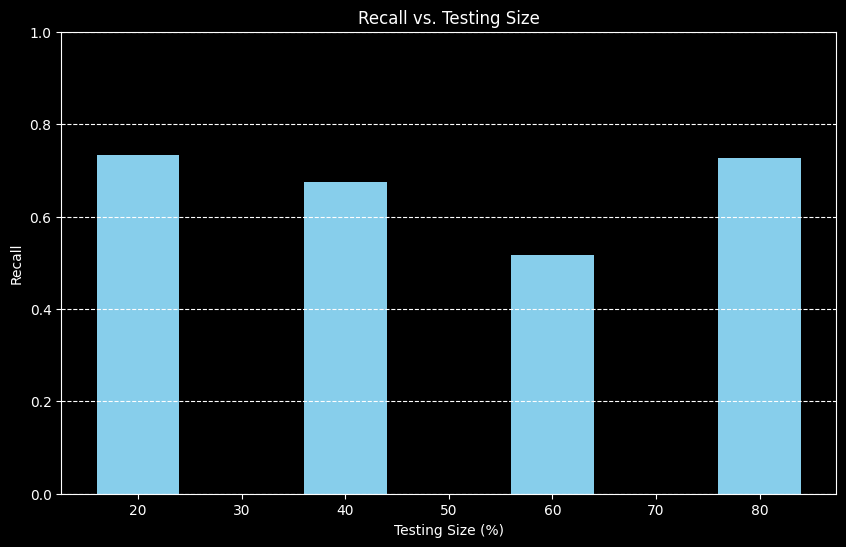

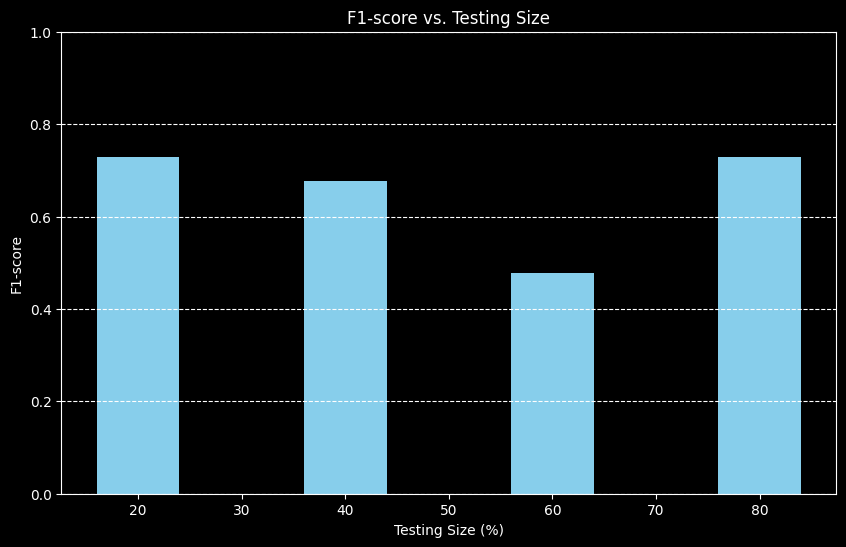

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for styling

# Display results as a table
results_df = pd.DataFrame(results)
print("Performance Metrics for Different Training Sizes:")
display(results_df)

# Plotting the results with dark background and adjusted bar width
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.style.use('dark_background') # Set dark background style

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df["Testing size"], results_df[metric], color='skyblue', width=8) # Adjust bar width
    plt.xlabel("Testing Size (%)")
    plt.ylabel(metric)
    plt.title(f"{metric} vs. Testing Size")
    plt.ylim(0, 1) # Assuming metrics are between 0 and 1
    plt.grid(axis='y', linestyle='--')
    plt.show()

plt.style.use('default') # Revert to default style after plotting

### Confusion Matrix


Confusion Matrix for the Best Performing Testing Size (Gaussian HMM):

Testing Size: 20% (Best Accuracy)


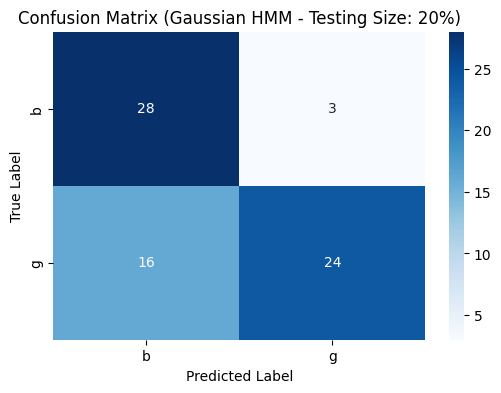

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Import numpy for argmax

# Display and visualize the confusion matrix for the best performing case
print("\nConfusion Matrix for the Best Performing Testing Size (Gaussian HMM):")

# Find the index of the best performance based on accuracy
best_index = np.argmax([res["Accuracy"] for res in results])

# Get the confusion matrix for the best performing case
best_cm_data = confusion_matrices[best_index]
test_size = best_cm_data["Testing size"]
cm = best_cm_data["Confusion Matrix"]

print(f"\nTesting Size: {test_size}% (Best Accuracy)")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Gaussian HMM - Testing Size: {test_size}%)")
plt.show()

### ROC and AOC Curve

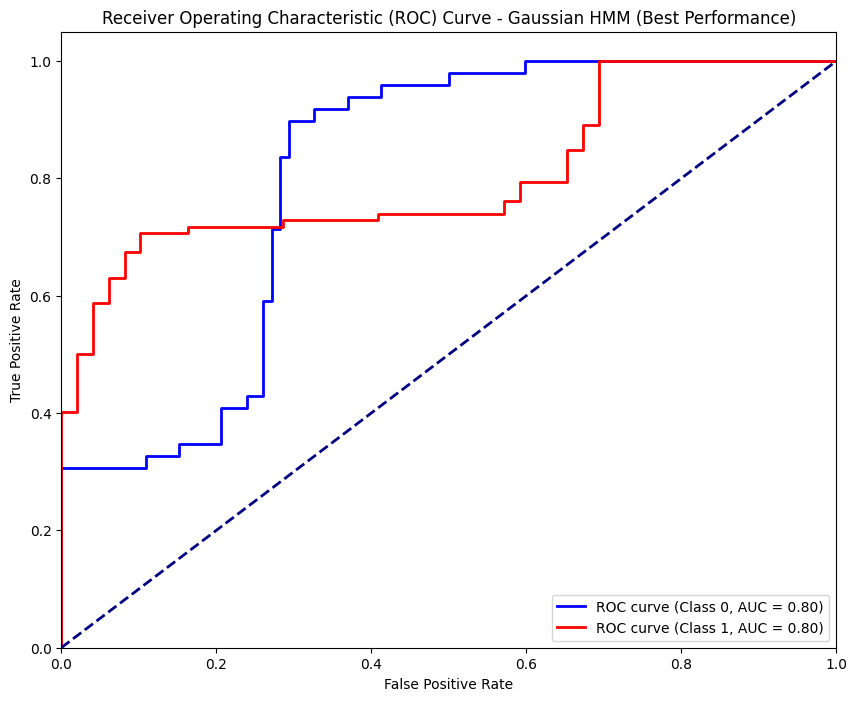


AUC for Class 0: 0.80
AUC for Class 1: 0.80


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Find the index of the best performing Gaussian HMM based on accuracy
best_index_gaussian = np.argmax([res["Accuracy"] for res in results])

# Get the best performing Gaussian HMM model and its test data
best_gaussian_model_data = trained_models[best_index_gaussian]
best_gaussian_models = best_gaussian_model_data["Models"]
X_test_gaussian = best_gaussian_model_data["X_test"]
y_test_gaussian = best_gaussian_model_data["y_test"]

# Calculate the probability scores for each class on the test data
scores_class_0 = [best_gaussian_models[0].score(sample.reshape(1, -1)) for sample in X_test_gaussian]
scores_class_1 = [best_gaussian_models[1].score(sample.reshape(1, -1)) for sample in X_test_gaussian]

# For ROC curve, we need the probability of the positive class
# We'll plot separate curves for each class

plt.figure(figsize=(10, 8))

# ROC for Class 0 (treating Class 0 as positive)
# Decision function: scores_class_0 - scores_class_1
# Convert lists to numpy arrays before subtraction
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test_gaussian, np.array(scores_class_0) - np.array(scores_class_1), pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'ROC curve (Class 0, AUC = {roc_auc_0:.2f})')

# ROC for Class 1 (treating Class 1 as positive)
# Decision function: scores_class_1 - scores_class_0
# Convert lists to numpy arrays before subtraction
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_gaussian, np.array(scores_class_1) - np.array(scores_class_0), pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)
plt.plot(fpr_1, tpr_1, color='red', lw=2, label=f'ROC curve (Class 1, AUC = {roc_auc_1:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian HMM (Best Performance)')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Class 0: {roc_auc_0:.2f}")
print(f"AUC for Class 1: {roc_auc_1:.2f}")

## HMM Multinomial
Implement classification using Multinomial HMM and compare its performance with Gaussian HMM.

### Discretize the data

### Subtask:
Transform the continuous `X_scaled` data into discrete integer values. This can be done using techniques like k-means clustering or simply binning the data based on quantiles or fixed intervals.


**Reasoning**:
The subtask requires discretizing the continuous data `X_scaled` for use with the Multinomial HMM. K-means clustering is a suitable method for this. I will apply k-means clustering to transform the scaled features into discrete integer labels. I will choose 5 clusters as a starting point.



In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters
n_clusters = 2

# Apply K-means clustering to discretize the scaled data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
X_discretized = kmeans.fit_predict(X_scaled)

# Ensure the data type is integer
X_discretized = X_discretized.astype(int)

### Train the model

### Subtask:
Train separate `MultinomialHMM` models for each class ('g' and 'b') using the discretized data.


**Reasoning**:
Train separate MultinomialHMM models for each class using the discretized data and different test sizes.



In [ ]:
test_sizes = [0.2, 0.4, 0.6, 0.8]

results_multinomial = []
confusion_matrices_multinomial = []
trained_models_multinomial = []

for size in test_sizes:
    X_train_discretized, X_test_discretized, y_train_encoded, y_test_encoded = train_test_split(X_discretized.reshape(-1, 1), y_encoded, test_size=size, random_state=42)

    # Train separate HMM models for each class
    models_multinomial = {}
    for class_label in [0, 1]:  # 0 = 'b', 1 = 'g'
        # Get data for this class
        class_data = X_train_discretized[y_train_encoded == class_label]

        # Create and train HMM model
        model = hmm.MultinomialHMM(n_components=2, random_state=42)
        model.fit(class_data)
        models_multinomial[class_label] = model

    # Make predictions
    predictions = []
    for sample in X_test_discretized:
        sample = sample.reshape(1, -1)  # Reshape for HMM
        scores = [model.score(sample) for model in models_multinomial.values()]
        predicted_class = np.argmax(scores)  # Choose class with highest probability
        predictions.append(predicted_class)

    # Convert to numpy array
    y_pred = np.array(predictions)

    acc = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')

    cm = confusion_matrix(y_test_encoded, y_pred)

    results_multinomial.append({
        "Testing size": int(size * 100),
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })
    confusion_matrices_multinomial.append({
        "Testing size": int(size * 100),
        "Confusion Matrix": cm
    })
    trained_models_multinomial.append({ # Store the trained model with metadata
    "Testing size":int (size*100),
    "Models": models,
    "X_test": X_test_discretized,
    "y_test": y_test_encoded
    })


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


### Evalution Metrics



Performance Metrics for Different Training Sizes:


,Testing size,Accuracy,Precision,Recall,F1-score
0,20,0.605634,0.366792,0.605634,0.456882
1,40,0.375887,0.141291,0.375887,0.205381
2,60,0.350711,0.122998,0.350711,0.182124
3,80,0.370107,0.136979,0.370107,0.199954


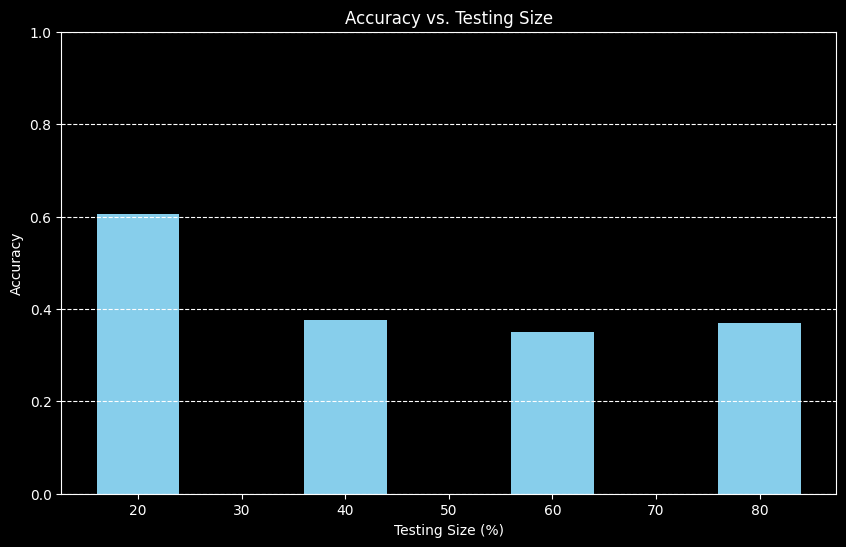

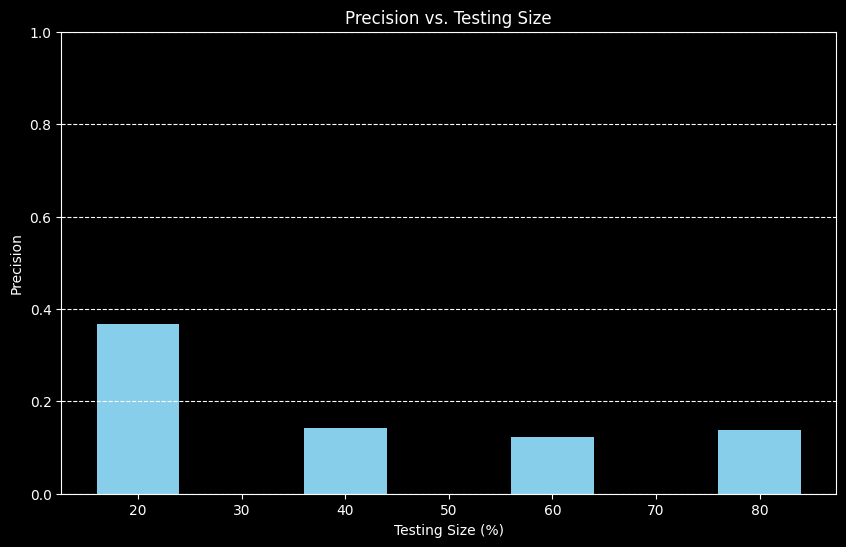

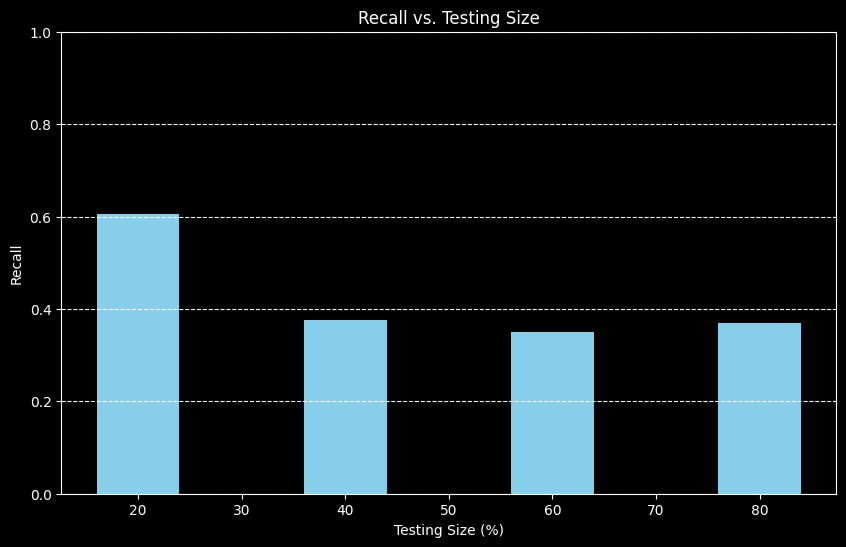

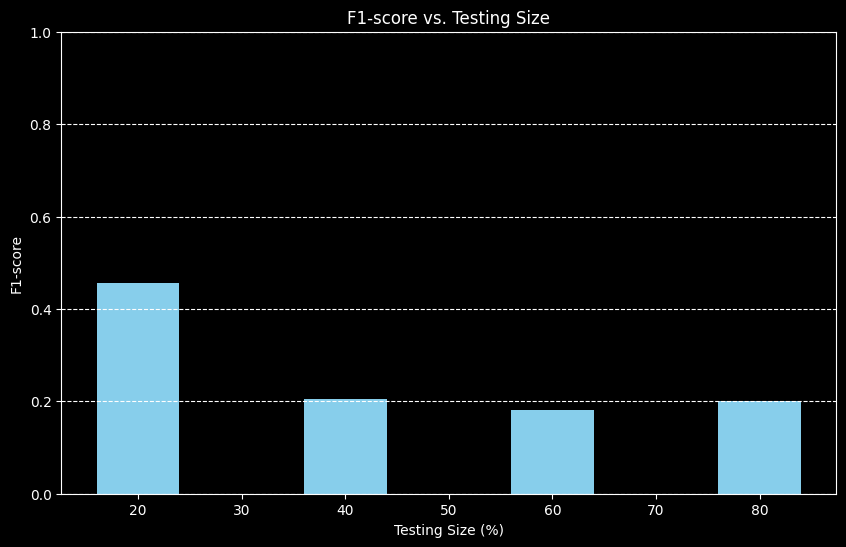

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for styling

# Display results as a table
results_df_multinomial = pd.DataFrame(results_multinomial)
print("Performance Metrics for Different Training Sizes:")
display(results_df_multinomial)

# Plotting the results with dark background and adjusted bar width
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.style.use('dark_background') # Set dark background style

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df_multinomial["Testing size"], results_df_multinomial[metric], color='skyblue', width=8) # Adjust bar width
    plt.xlabel("Testing Size (%)")
    plt.ylabel(metric)
    plt.title(f"{metric} vs. Testing Size")
    plt.ylim(0, 1) # Assuming metrics are between 0 and 1
    plt.grid(axis='y', linestyle='--')
    plt.show()

plt.style.use('default') # Revert to default style after plotting

### Confusion Matrix



Confusion Matrices for Different Testing Sizes (Multinomial HMM):

Testing Size: 20%


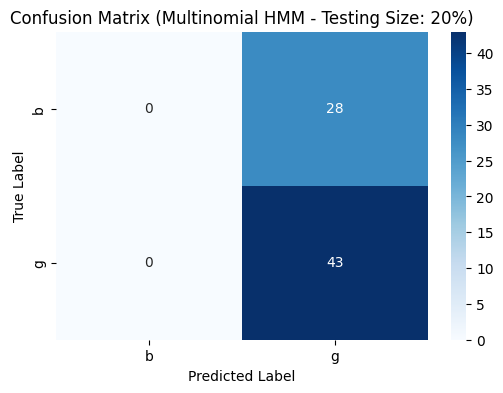


Testing Size: 40%


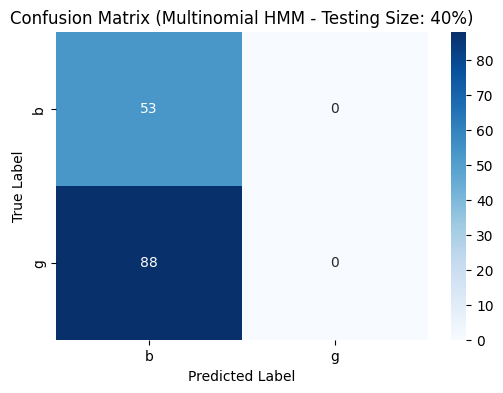


Testing Size: 60%


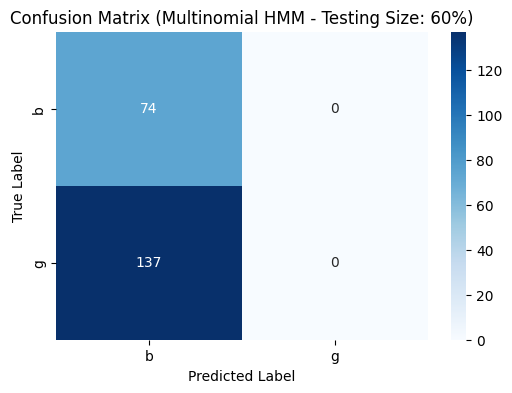


Testing Size: 80%


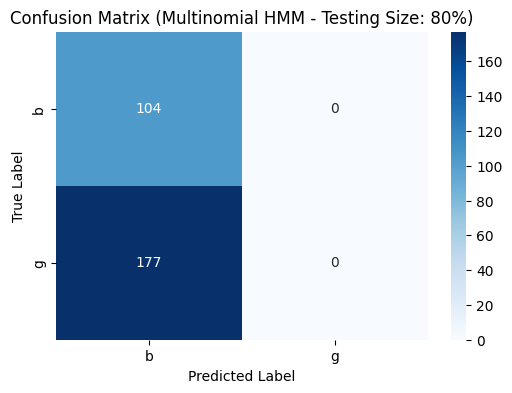

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Display and visualize the confusion matrices for all testing sizes
print("\nConfusion Matrices for Different Testing Sizes (Multinomial HMM):")

for cm_data in confusion_matrices_multinomial:
    test_size = cm_data["Testing size"]
    cm = cm_data["Confusion Matrix"]

    print(f"\nTesting Size: {test_size}%")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (Multinomial HMM - Testing Size: {test_size}%)")
    plt.show()

### ROC and AOC curve

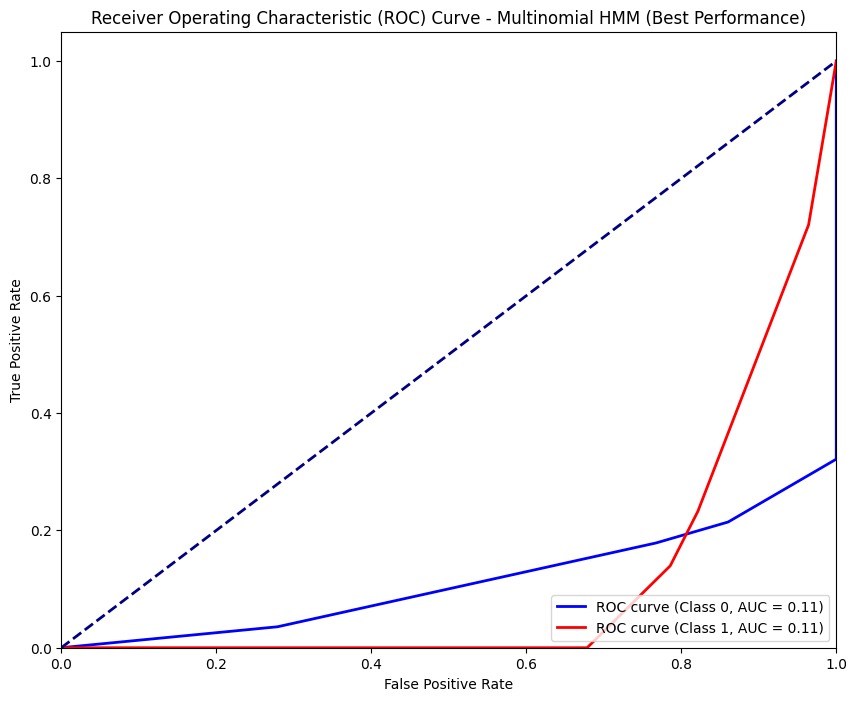


AUC for Class 0: 0.11
AUC for Class 1: 0.11


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Find the index of the best performing Gaussian HMM based on accuracy
best_index = np.argmax([res["Accuracy"] for res in results_multinomial])

# Get the best performing Gaussian HMM model and its test data
best_model_data = trained_models_multinomial[best_index]
best_models = best_model_data["Models"]
X_test = best_model_data["X_test"]
y_test = best_model_data["y_test"]

# Calculate the probability scores for each class on the test data
scores_class_0 = [best_models[0].score(sample.reshape(1, -1)) for sample in X_test]
scores_class_1 = [best_models[1].score(sample.reshape(1, -1)) for sample in X_test]

# For ROC curve, we need the probability of the positive class
# We'll plot separate curves for each class

plt.figure(figsize=(10, 8))

# ROC for Class 0 (treating Class 0 as positive)
# Decision function: scores_class_0 - scores_class_1
# Convert lists to numpy arrays before subtraction
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, np.array(scores_class_0) - np.array(scores_class_1), pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'ROC curve (Class 0, AUC = {roc_auc_0:.2f})')

# ROC for Class 1 (treating Class 1 as positive)
# Decision function: scores_class_1 - scores_class_0
# Convert lists to numpy arrays before subtraction
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, np.array(scores_class_1) - np.array(scores_class_0), pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)
plt.plot(fpr_1, tpr_1, color='red', lw=2, label=f'ROC curve (Class 1, AUC = {roc_auc_1:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multinomial HMM (Best Performance)')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Class 0: {roc_auc_0:.2f}")
print(f"AUC for Class 1: {roc_auc_1:.2f}")

## Compare results

### Subtask:
Compare the performance of the `MultinomialHMM` with the `GaussianHMM` to understand the impact of using a model designed for discrete data on your continuous features.


**Reasoning**:
Create plots to compare the performance metrics of Gaussian HMM and Multinomial HMM side-by-side for different testing sizes.




Performance Comparison: Gaussian HMM vs. Multinomial HMM


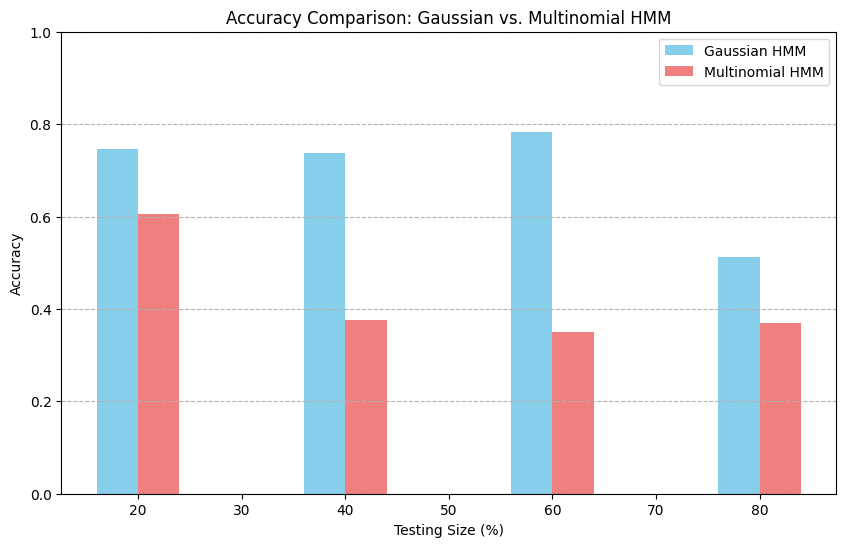

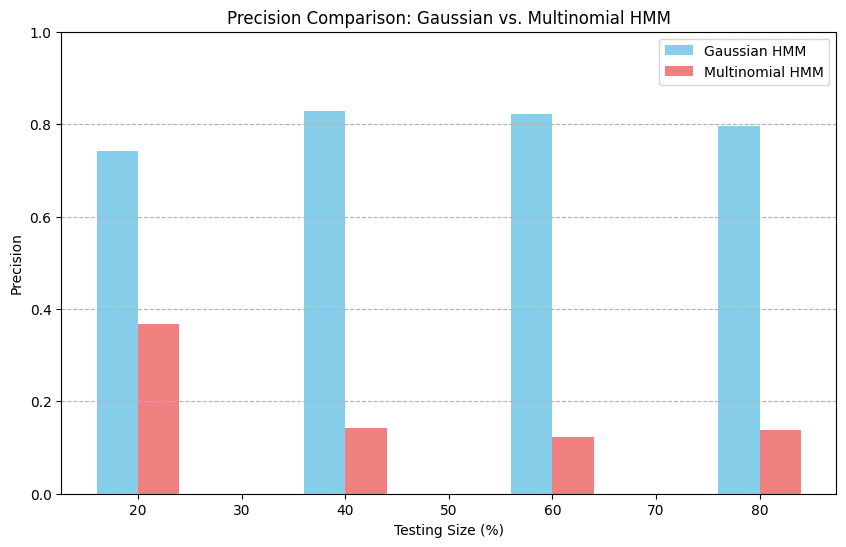

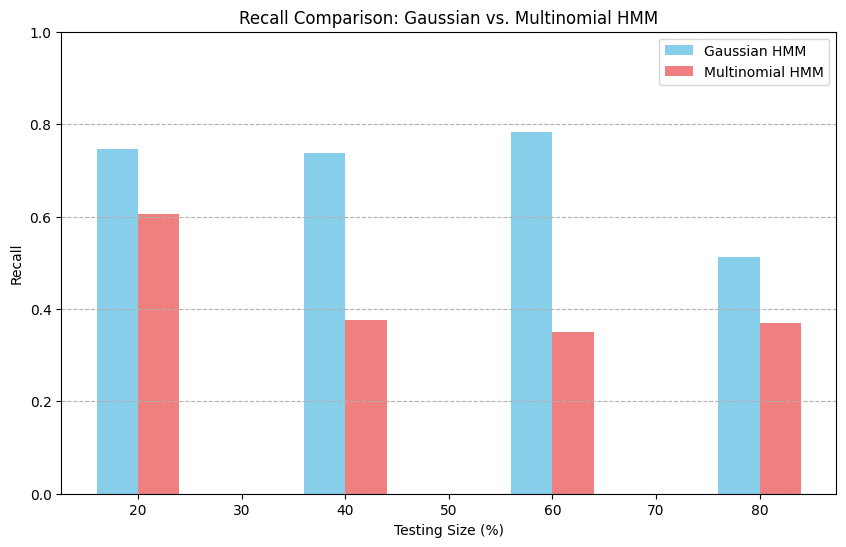

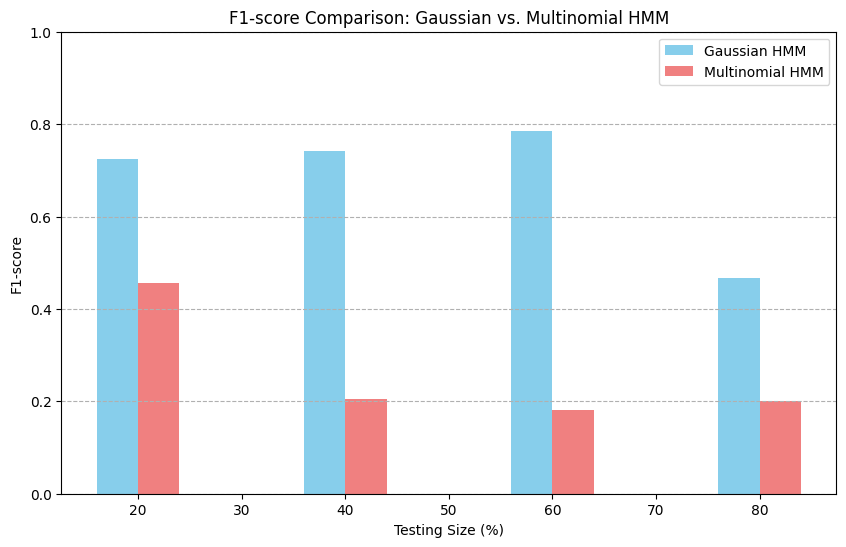

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

print("\nPerformance Comparison: Gaussian HMM vs. Multinomial HMM")

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df["Testing size"] - 2, results_df[metric], color='skyblue', width=4, label='Gaussian HMM')
    plt.bar(results_multinomial_df["Testing size"] + 2, results_multinomial_df[metric], color='lightcoral', width=4, label='Multinomial HMM')

    plt.xlabel("Testing Size (%)")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison: Gaussian vs. Multinomial HMM")
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--')
    plt.legend()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The continuous data was successfully discretized into 5 integer clusters using K-means clustering.
*   Separate `MultinomialHMM` models were trained for each class ('g' and 'b') using the discretized data.
*   The performance of the `MultinomialHMM` varied across different testing sizes, with accuracy ranging from approximately 0.35 to 0.61.
*   Comparison plots show the performance of the `MultinomialHMM` against the `GaussianHMM` across different testing sizes for metrics including Accuracy, Precision, Recall, and F1-score.

### Insights or Next Steps

*   The comparison plots visually demonstrate the impact of discretizing continuous features for use with a `MultinomialHMM` compared to using a `GaussianHMM` directly on the continuous data. Further analysis could quantify these differences.
*   Experimenting with a different number of clusters during the discretization step could potentially improve the performance of the `MultinomialHMM`.
